

## **PERKISON'S DISEASE DATA SET**
To detecting and predict perkison's  disease- phython machine learninig project
# **ABOUT THE DATA**

---
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Mohamed Adow- certified data scientist (mohdadow@gmail.com).



 **ATTRIBUTES**

 Attribute Information:

- **name**: Subject name and recording number
- **MDVP:Fo(Hz)**: Average vocal frequency
- **MDVP:Fhi(Hz)**: Max vocal frequency
- **MDVP:Flo(Hz)**: Min vocal frequency
- **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP**: Frequency variation measures
- **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA**: Amplitude variation measures
- **NHR, HNR**: Noise-to-tone ratio measures
- **status**: Health status (1 = Parkinson's, 0 = healthy)
- **RPDE, D2**: Dynamical complexity measures
- **DFA**: Fractal scaling exponent
- **spread1, spread2, PPE**: Frequency variation measures






In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## **EXPLORATORY DATA ANALYSIS**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')



1.   **no null values**
2.   **name is the only variable with object data type**
3.   **status is an interger variable**
4.   **A considerable portion of our variables are objects (22)**





**cheking correlation among the variables**

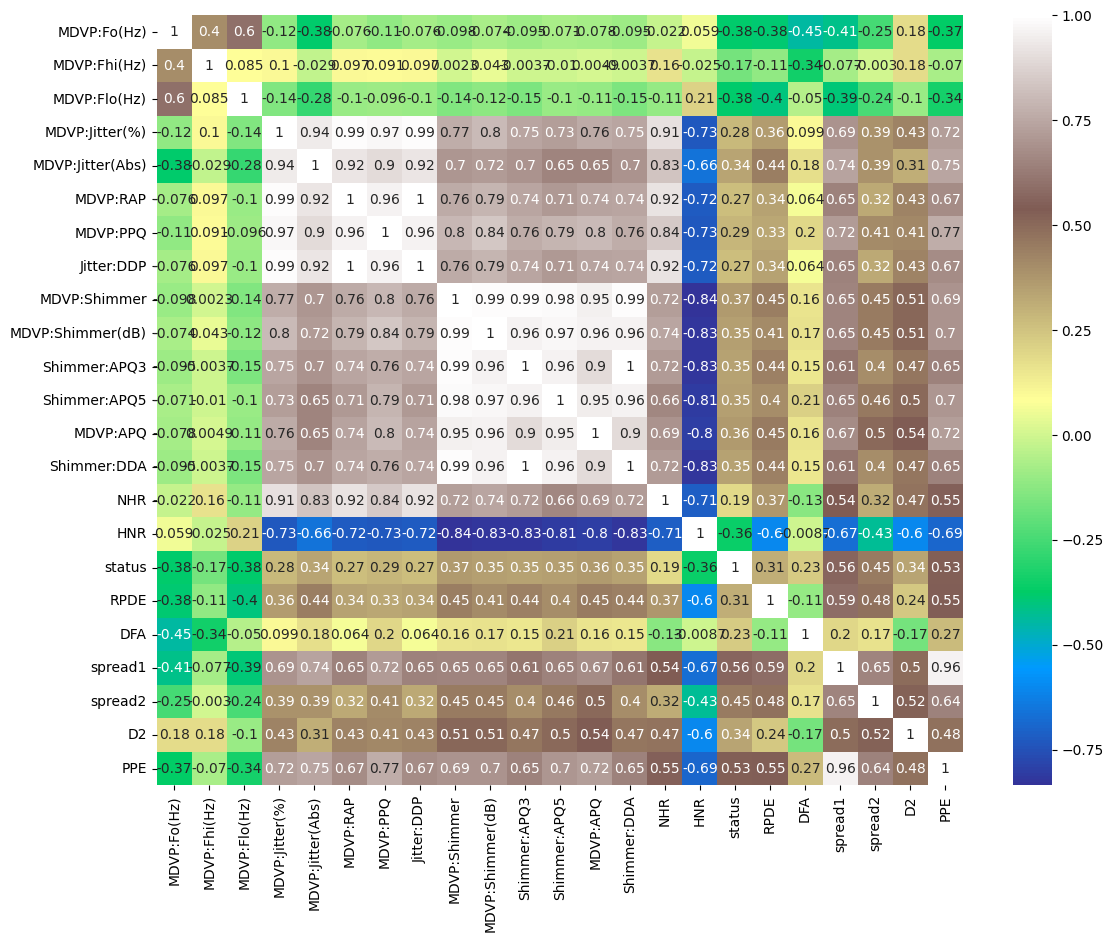

In [5]:
plt.figure(figsize=(13,10))
sns.heatmap(df.drop("name", axis=1).corr(),annot=True,cmap="terrain")
plt.savefig('heatmap.png')
plt.show()

**Several voice features can help identify Parkinson's disease. Spread1, PPE, and Spread2 tend to be higher in people with Parkinson's, while the opposite is true for MDVP:Fo(Hz) and MDVP:Flo(Hz). These features are lower in people with the disease.**

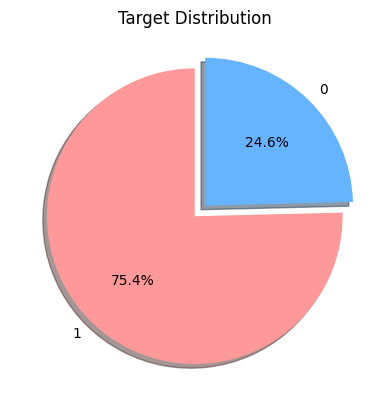

<Figure size 640x480 with 0 Axes>

In [6]:
df['status'].value_counts().plot(kind='pie',startangle = 90, autopct = '%1.1f%%', explode = (0,0.1), shadow = True, title = 'Target Distribution',colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.show()
plt.savefig('Target distribution.png')

**The data shows a significant prevalence of Parkinson's disease. Roughly three-quarters (74.5%) of the individuals have the condition, while the remaining quarter (24.6%) are free of the disease**

In [7]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

**1-> perkison's positive**


**0-> healthy**

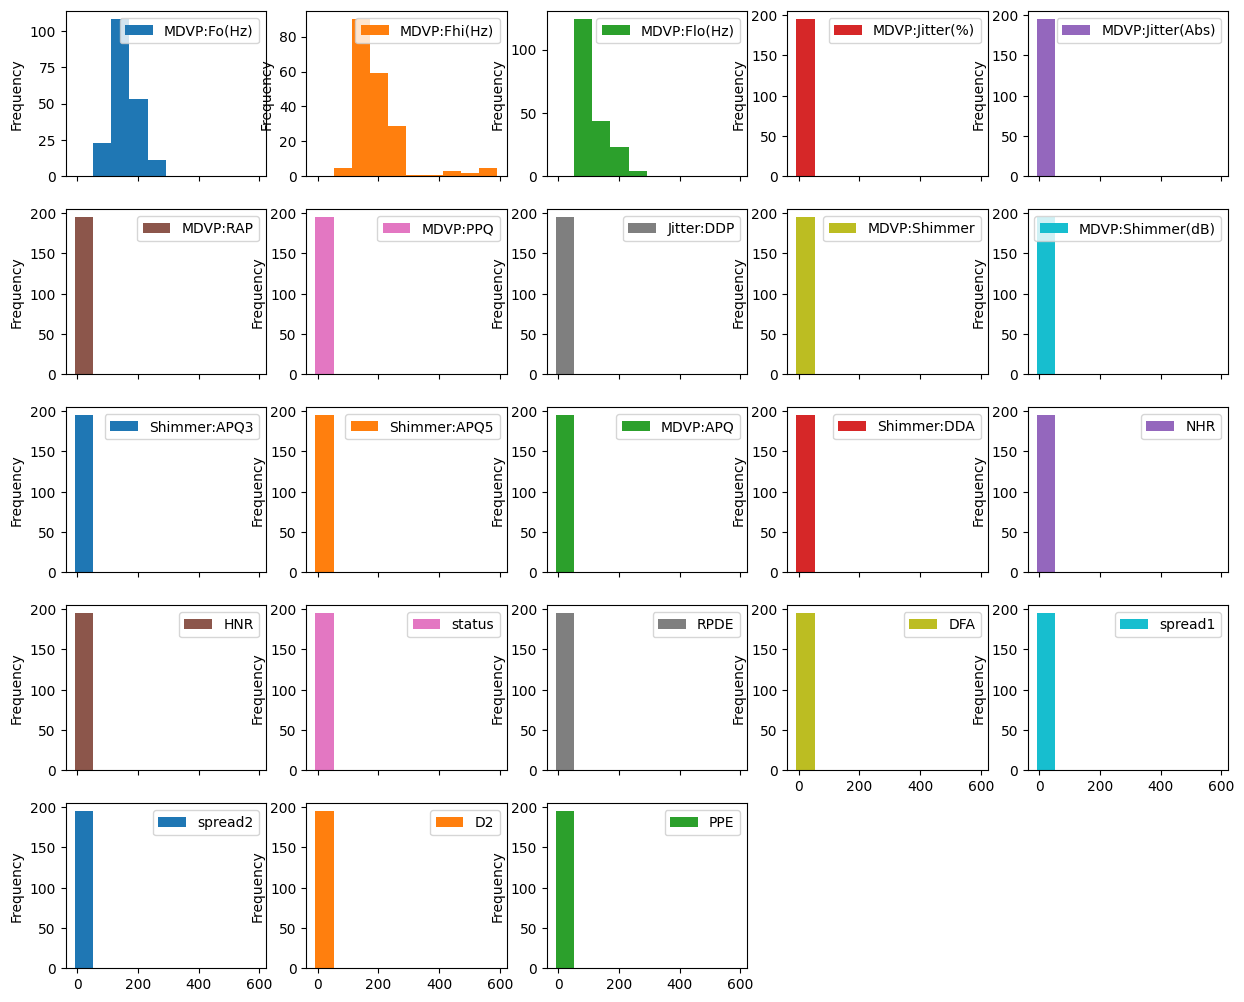

In [8]:
df.drop('name', axis = 1).plot(kind='hist',subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

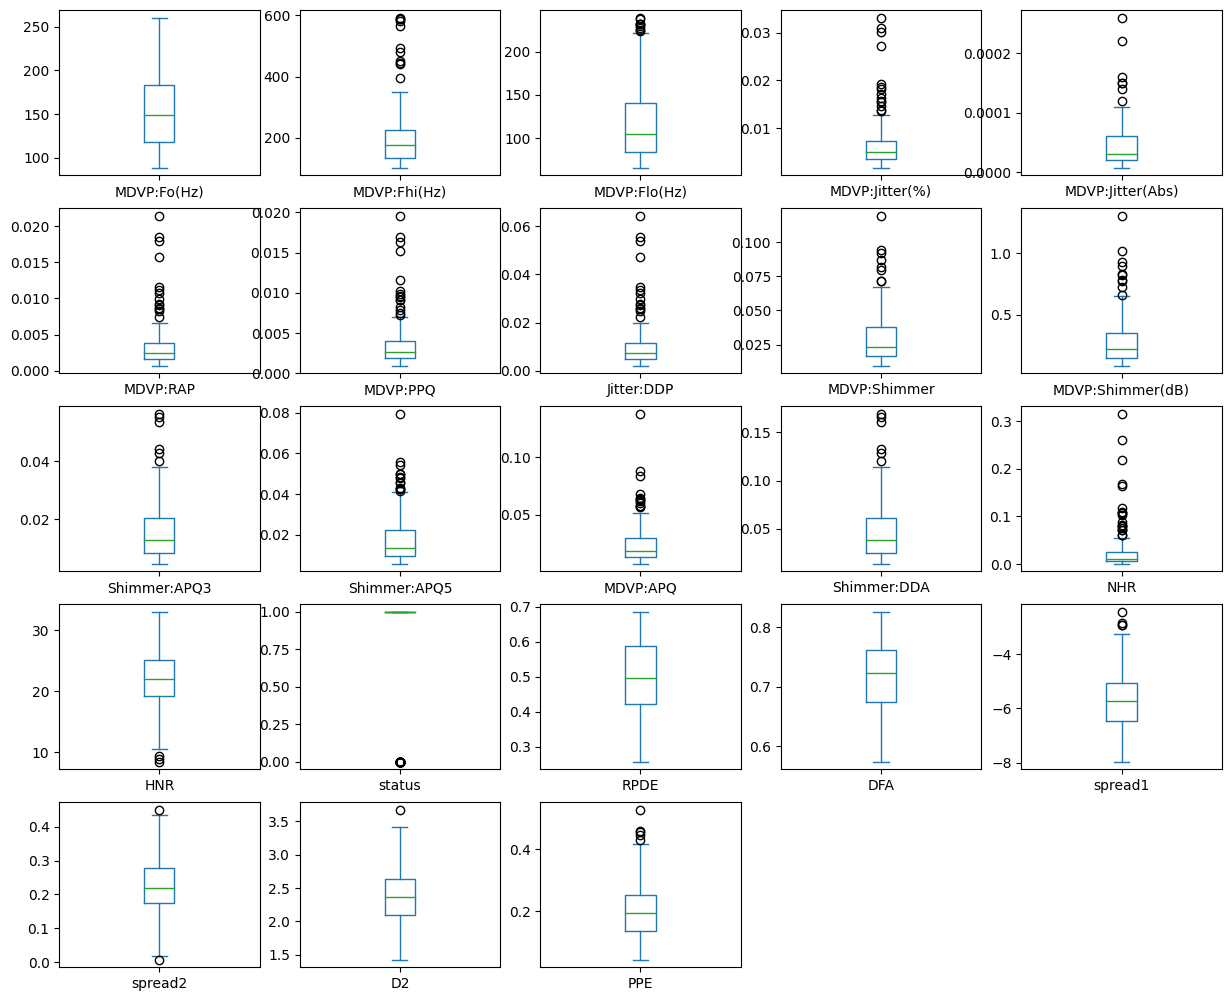

In [9]:
df.drop('name', axis = 1).plot(kind='box',subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

Box plots reveal key characteristics of features linked to Parkinson's disease.
These features show:

1.   Center point (distribution's middle)
2.   Spread of data (variability)
3.   outliers
the data shows significant presence of outliers.

DATA PRE-PROCESSING

seperating feautures and target


In [10]:
#importing trainlibrary
from sklearn.model_selection import train_test_split

#Naming X and Y features
x = df.drop(['name','status'],axis=1)
y = df['status']

#Splitting the data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print("Training: ", X_train.shape, y_train.shape)
print("Testing: ", X_test.shape, y_test.shape)

Training:  (156, 22) (156,)
Testing:  (39, 22) (39,)


In [11]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Standardizing the data

In [13]:
#Using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

In [14]:
print(x_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## fitting the model

support vector machine (SVM)

In [16]:
from sklearn import svm

In [17]:
model = svm.SVC(kernel = 'linear', probability= True)
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

MODEL EVALUATION

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Model for training and Test
x_pred_train = model.predict(x_train)
x_pred_test = model.predict(x_test)

#checking training and test accuracy
print("Training Accuracy: ", accuracy_score(y_train, x_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, x_pred_test))

Training Accuracy:  0.8846153846153846
Testing Accuracy:  0.8717948717948718


In [19]:
#calculate probabilities for Roc-Auc
y_pred_prob = model.predict_proba(x_test)[:,1]

#calculate metrics
precision = precision_score(y_test, x_pred_test)
recall = recall_score(y_test, x_pred_test)
f1 = f1_score(y_test, x_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#print metrics
print(f"Precision: {precision: .4f}")
print(f"Recall: {recall: .4f}")
print(f"F1 Score: { f1: .4f}")
print(f"ROC AUC: {roc_auc: .4f}")

Precision:  0.9062
Recall:  0.9355
F1 Score:  0.9206
ROC AUC:  0.8185


FEATURE PERFORMANCE

In [20]:
# Access the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute values of coefficients in descending order
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)

# Reset the index
feature_importance = feature_importance.reset_index(drop=True)

# Display the feature importance ranking
print(feature_importance)

             Feature  Coefficient
0            spread1     1.145376
1     MDVP:Jitter(%)    -0.755728
2           MDVP:APQ     0.735968
3   MDVP:Jitter(Abs)    -0.730562
4           MDVP:RAP     0.700639
5         Jitter:DDP     0.698320
6            spread2     0.425204
7                PPE     0.422713
8               RPDE    -0.403131
9                DFA     0.389145
10                D2     0.304452
11      MDVP:Shimmer     0.243707
12       Shimmer:DDA    -0.216627
13      Shimmer:APQ3    -0.215151
14               HNR     0.200717
15      Shimmer:APQ5     0.169448
16          MDVP:PPQ    -0.152529
17      MDVP:Flo(Hz)    -0.116248
18       MDVP:Fo(Hz)    -0.099476
19      MDVP:Fhi(Hz)    -0.087892
20               NHR     0.068534
21  MDVP:Shimmer(dB)    -0.034614


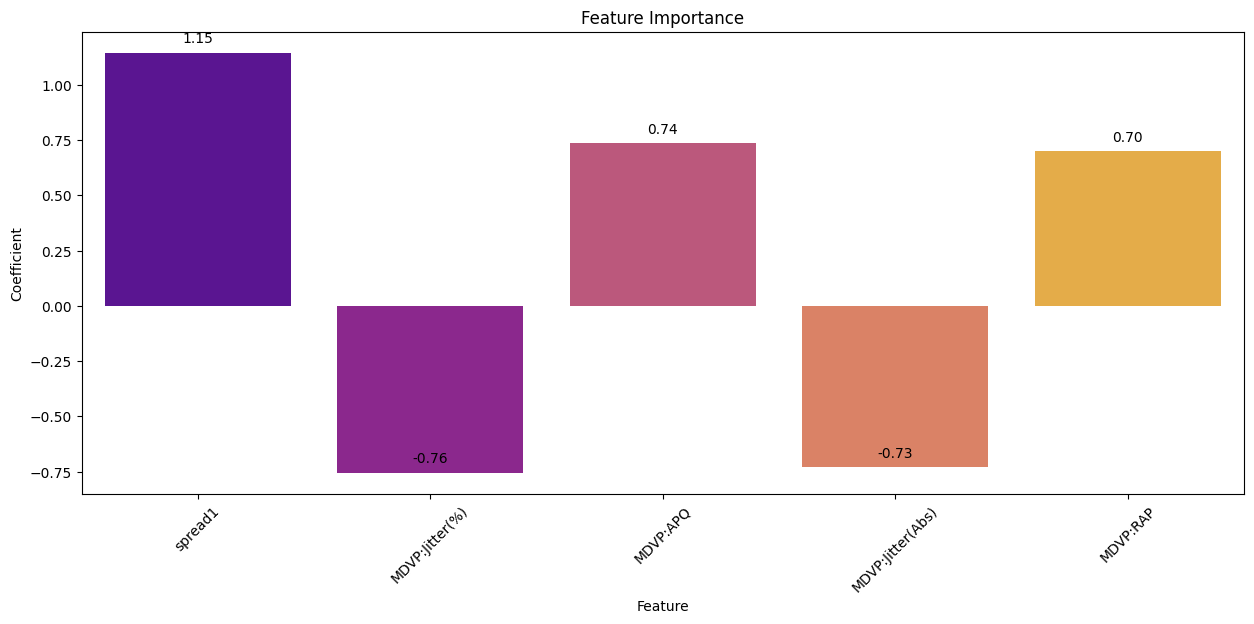

In [21]:
#Top 5 Features
top_features = feature_importance.head(5)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Feature', y='Coefficient', data=top_features, palette = 'plasma')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

# Add data labels above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.show()


In [22]:
# making prediction


In [23]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = sc.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


SAVING THE MODEL

In [24]:
import pickle
file_name = 'parkinsons_model.pkl'
pickle.dump(model, open(file_name, 'wb'))

Loading the model

In [25]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [26]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = sc.transform(input_data_reshaped)

prediction = loaded_model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease
